<a href="https://colab.research.google.com/github/UnchaeJeong/R_project/blob/master/NLP_day1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# &#128218;NLTK 1. 설치

In [ ]:
import nltk
from konlpy.tag import Komoran # 여러가지 형태소 라이브러리 패키지
komoran = Komoran()

In [ ]:
# !pip install nltk
# 문장 토큰화
# 태깅에 필요한 자원 내려받기
# 품사 태깅

In [ ]:
# 문장 토큰화
import nltk

nltk.download('punkt')

text = nltk.word_tokenize('It is posible cats and dogs')
text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['It', 'is', 'posible', 'cats', 'and', 'dogs']

In [ ]:
# 태깅에 필요한 자원 내려받기
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# 품사 태깅
nltk.pos_tag(text)

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('posible', 'JJ'),
 ('cats', 'NNS'),
 ('and', 'CC'),
 ('dogs', 'NNS')]

# &#128218;Konlpy 2. 설치

품사 태깅 라이브러리 여러개 있음.

In [ ]:
# !pip install konlpy
# 라이브러리 호출 및 문장을 형태로 변환
# 품사 태깅
# konlpy.tag의 Okt 써보기
# okt.morphs, pos

윈도우에서는 이게 문제. JPype1-1.3.0.
자바, 파이썬 연동하는 것.
코랩은 자바을 기반으로 되어있어서 상관없음.

In [ ]:
# 라이브러리 호출 및 문장을 형태로 변환
from konlpy.tag import Komoran # 여러가지 형태소 라이브러리 패키지
komoran = Komoran()

print(komoran.morphs('딥러닝이 쉽나요? 어렵나요?')) # 형태소 분리
# 품사 태깅
print(komoran.pos('딥러닝이 쉽나요? 어렵나요?')) # 품사 태깅. 각각의 단어가 무엇인지 분석함.
print(komoran.pos('아 여행가고 싶다. 제주도 여행'))
print(komoran.pos('아 날씨 미쵸따...진짜'))
print(komoran.pos('4드론 에바잖아... 어머니 잘계시고?'))

['딥러닝이', '쉽', '나요', '?', '어렵', '나요', '?']
[('딥러닝이', 'NA'), ('쉽', 'VA'), ('나요', 'EF'), ('?', 'SF'), ('어렵', 'VA'), ('나요', 'EF'), ('?', 'SF')]
[('아', 'IC'), ('여행가', 'NNG'), ('이', 'VCP'), ('고', 'EC'), ('싶', 'VX'), ('다', 'EF'), ('.', 'SF'), ('제주도', 'NNP'), ('여행', 'NNG')]
[('아', 'IC'), ('날씨', 'NNP'), ('미쵸따...진짜', 'NA')]
[('4', 'SN'), ('드', 'NNP'), ('로', 'JKB'), ('ㄴ', 'JX'), ('에바', 'NNP'), ('잖아', 'EF'), ('...', 'SE'), ('어머니', 'NNG'), ('잘', 'MAG'), ('계시', 'VV'), ('고', 'EF'), ('?', 'SF')]


In [ ]:
# konlpy.tag의 Okt 써보기
from konlpy.tag import Okt # 문장이 복잡할수록 komoran과 상이한 결과가 나올 수 있음.
okt = Okt()

In [ ]:
# okt.morphs, pos
text = '한글 자연어 처리는 재밌다. 이제부터 열심히 해야짛ㅎㅎㅎ'
print(okt.morphs(text))
print(okt.pos(text))
print(okt.morphs('열심히 해야짛ㅎㅎ', stem=True)) # 형태소 단위로 나눈 후 어간을 추출

['한글', '자연어', '처리', '는', '재밌다', '.', '이제', '부터', '열심히', '해야짛', 'ㅎㅎㅎ']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('.', 'Punctuation'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야짛', 'Noun'), ('ㅎㅎㅎ', 'KoreanParticle')]
['열심히', '해야짛', 'ㅎㅎ']


---
---
## &#128218;뉴스기사 분석

In [ ]:
# str
# 형태소 나누고 어간 추출

In [ ]:
str = """
'한국 여자배구 대표팀은 지난달 31일 오후 일본 도쿄 아리아케 아레나에서 열린 2020 도쿄올림픽 A조 예선으로 펼쳐진 한일전에서 5세트 접전 끝에 짜릿한 승리를 거뒀다.

한국은 마지막 5세트에서 12대14로 밀렸다. '게임 포인트'를 내줄 위기에 몰렸지만 박정아의 막판 대활약에 힘입어 극적인 16대14 역전 드라마를 연출했다.

이로써 한국은 3승1패를 기록해 남은 세르비아전 결과와 관계 없이 최소 조 3위를 확보해 8강 진출을 확정했다.'
"""
print(str)
print(okt.morphs(str, stem=True))   # 형태소 나누고 어간 추출


'한국 여자배구 대표팀은 지난달 31일 오후 일본 도쿄 아리아케 아레나에서 열린 2020 도쿄올림픽 A조 예선으로 펼쳐진 한일전에서 5세트 접전 끝에 짜릿한 승리를 거뒀다.

한국은 마지막 5세트에서 12대14로 밀렸다. '게임 포인트'를 내줄 위기에 몰렸지만 박정아의 막판 대활약에 힘입어 극적인 16대14 역전 드라마를 연출했다.

이로써 한국은 3승1패를 기록해 남은 세르비아전 결과와 관계 없이 최소 조 3위를 확보해 8강 진출을 확정했다.'

['\n', "'", '한국', '여자배구', '대표팀', '은', '지난달', '31일', '오후', '일본', '도쿄', '아리아케', '아레나', '에서', '열리다', '2020', '도쿄올림픽', 'A', '조', '예선', '으로', '펼쳐지다', '한일전', '에서', '5', '세트', '접전', '끝', '에', '짜릿하다', '승리', '를', '거두다', '.', '\n\n', '한국', '은', '마지막', '5', '세트', '에서', '12', '대다', '14', '로', '밀리다', '.', "'", '게임', '포인트', "'", '를', '내주다', '위기', '에', '몰리다', '박정아', '의', '막판', '대', '활약', '에', '힘', '입다', '극적', '인', '16', '대다', '14', '역전', '드라마', '를', '연출', '하다', '.', '\n\n', '이로써', '한국', '은', '3', '승', '1', '패', '를', '기록', '하다', '남다', '세르비아', '전', '결과', '와', '관계', '없이', '최소', '조', '3', '위', '를', '확보', '하다', '8', '강', '진출', '을', '확정', '하다', ".'", '\n']


---
---
## &#128218;오늘의 날씨

In [ ]:
# okt.pos()
# 날씨를 알려달라는 거구나 = 명사 의도 분석

In [ ]:
# okt.pos()
result = okt.pos('부산 날씨 어때', stem=True)
print(result) 

[('부산', 'Noun'), ('날씨', 'Noun'), ('어떻다', 'Adjective')]


In [ ]:
# 날씨를 알려달라는 거구나 = 명사 의도 분석
nouns =[ token[0] for token in result if token[1] ==
        'Noun']
print(nouns) # 날씨를 알려달라는 거구나 = 명사 의도 분석

['부산', '날씨']


---
---
## JAVA 설치 jpypel 설치

---
JAVA 설치해서 jupyter Notebook으로 실행하려면 다음과 같은 순서로 설치.
https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

1. JDK설치
2. JAVA_HOME 설정(jdk root)
3. PATH 설정(bin)
4. jpypel 설치(파이썬버전, amd64, whl)   
JPype1‑1.1.2‑cp38‑cp38‑win_amd64.whl로 설치할것.

---
의미를 갖는 최소 단위는 형태소   
Gensim : 임베딩 : 워드 투 벡터(내일 살펴볼 것)  
추가설치 필요

---
CountVectorizer : 단어 등장 횟수 기준   
Tfidfvectorizer :    
HashingVectorizer      
지금까지 nplk, 설치과정, sklearn, gensim 소개 오전수업 끝


---
---


## &#128218;BeautifulSoup 

---
형태소 분석과 태깅 +   
룰을 통해서 '부산'을 가져옴.

In [ ]:
# !pip install beautifulsoup4

# soup = BeautifulSoup(html.text, '') # 구문분석
# cast = soup.select_one('') # 노드 리턴
# temps = soup.select_one('')
# print(cast.text,temps.text) # text node

# def getWeather(str) :
#   result = okt.pos(str, stem=True)
#   nouns = [ token[0] for token in result if token[1] == 'Noun']

#   city = ''
#   for token in nouns:

#   html = requests.get(f'https://search.naver.com/search.naver?query={city}날씨')

#   soup, cast, temps, return

# getWeather("런던 오늘 날씨 어때?")
# result = okt.pos('부산의 어제 날씨 어때', stem=True) # 구문 분석 확인

In [ ]:
# 좋은 방법은 아님.
city = ''
for token in nouns:
  if token =='오늘':
    day = token
  elif token == '날씨':
    intent = '날씨'
  else :
    city = token
print(city)

부산


where=   
query=부산날씨   
beautifulsoup을 활용해서 필요한 정보를 가져올 수 있음.   


https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B0%80%EC%82%B0+%EB%82%A0%EC%94%A8

In [ ]:
# !pip install beautifulsoup4

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="부산날씨 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'부산날씨\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'부산날씨\'의 네이버 통합검색 결과입니다."> <title>부산날씨 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210729.css"> <link rel="stylesheet" type="text/css" 
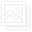
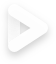
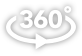
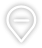
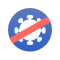
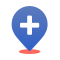
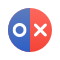
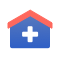

In [ ]:
from bs4 import BeautifulSoup
import requests

city = '부산'
html = requests.get(f'https://search.naver.com/search.naver?query={city}날씨')
html.text

In [ ]:
soup = BeautifulSoup(html.text, 'html.parser') # 구문분석
cast = soup.select_one('p.cast_txt') # 노드 리턴
temps = soup.select_one('span.todaytemp')
print(cast.text,temps.text) # text node

맑음, 어제보다 1˚ 높아요 30


In [ ]:
def getWeather(str) :
  result = okt.pos(str, stem=True)
  nouns = [ token[0] for token in result if token[1] == 'Noun']

  city = ''
  for token in nouns:
    if token =='오늘':
      day = token
    elif token == '날씨':
      intent = '날씨'
    else :
      city = token

  html = requests.get(f'https://search.naver.com/search.naver?query={city}날씨')

  soup = BeautifulSoup(html.text, 'html.parser') # 구문분석
  cast = soup.select_one('p.cast_txt') # 노드 리턴
  temps = soup.select_one('span.todaytemp')
  return f'{city}날씨 : {cast.text}, 온도:{temps.text}'


getWeather("런던 오늘 날씨 어때?")

'런던날씨 : 맑음, 체감온도 14℃, 온도:14'

In [ ]:
result = okt.pos('부산의 어제 날씨 어때', stem=True) # 구문 분석 확인
result

[('부산', 'Noun'),
 ('의', 'Josa'),
 ('어제', 'Noun'),
 ('날씨', 'Noun'),
 ('어떻다', 'Adjective')]

---
---
조코딩   
https://www.youtube.com/watch?v=CxfBtW3VshY

---
---
## &#128218;**9.2 전처리** 


NaN 는 어떻게 처리할까?   
1. 몸무게를 0으로 취한다. -> 이상치 처리   
2. 키 몸무게 비율로 해준다.    
3. 평균값 준다.   

### &#128218;결측치확인하기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/class2.csv')

In [ ]:
df.head()

,Unnamed: 0,id,tissue,class,class2,x,y,r
0,0,mdb000,C,CIRC,N,535.0,475.0,192.0
1,1,mdb001,A,CIRA,N,433.0,268.0,58.0
2,2,mdb002,A,CIRA,I,NaN,NaN,NaN
3,3,mdb003,C,CIRC,B,NaN,NaN,NaN
4,4,mdb004,F,CIRF,I,488.0,145.0,29.0


In [ ]:
df.isnull().sum() # 검출

Unnamed: 0    0
id            0
tissue        0
class         0
class2        0
x             2
y             2
r             2
dtype: int64

In [ ]:
df.dropna(how='all')
display(df)
df1 = df.dropna() # 데이터에 하나라도 NaN값이 있으면 행을 삭제
display(df1)

,Unnamed: 0,id,tissue,class,class2,x,y,r
0,0,mdb000,C,CIRC,N,535.0,475.0,192.0
1,1,mdb001,A,CIRA,N,433.0,268.0,58.0
2,2,mdb002,A,CIRA,I,NaN,NaN,NaN
3,3,mdb003,C,CIRC,B,NaN,NaN,NaN
4,4,mdb004,F,CIRF,I,488.0,145.0,29.0
5,5,mdb005,F,CIRF,B,544.0,178.0,26.0


,Unnamed: 0,id,tissue,class,class2,x,y,r
0,0,mdb000,C,CIRC,N,535.0,475.0,192.0
1,1,mdb001,A,CIRA,N,433.0,268.0,58.0
4,4,mdb004,F,CIRF,I,488.0,145.0,29.0
5,5,mdb005,F,CIRF,B,544.0,178.0,26.0


In [ ]:
df2 = df.fillna(0)
print(df2)

   Unnamed: 0      id tissue class class2      x      y      r
0           0  mdb000      C  CIRC      N  535.0  475.0  192.0
1           1  mdb001      A  CIRA      N  433.0  268.0   58.0
2           2  mdb002      A  CIRA      I  500.0    0.0    0.0
3           3  mdb003      C  CIRC      B  500.0    0.0    0.0
4           4  mdb004      F  CIRF      I  488.0  145.0   29.0
5           5  mdb005      F  CIRF      B  544.0  178.0   26.0


In [ ]:
df['x'].fillna(df['x'].mean(), inplace=True)
print(df)

   Unnamed: 0      id tissue class class2      x      y      r
0           0  mdb000      C  CIRC      N  535.0  475.0  192.0
1           1  mdb001      A  CIRA      N  433.0  268.0   58.0
2           2  mdb002      A  CIRA      I  500.0    NaN    NaN
3           3  mdb003      C  CIRC      B  500.0    NaN    NaN
4           4  mdb004      F  CIRF      I  488.0  145.0   29.0
5           5  mdb005      F  CIRF      B  544.0  178.0   26.0


---
### &#128218;기계학습을 이용한 결측치 처리
> D1_교과서09.자연어처리(7)_NLP(기계학습을통한 결측치 제거).mp4


In [ ]:
display(df1)

,Unnamed: 0,id,tissue,class,class2,x,y,r
0,0,mdb000,C,CIRC,N,535.0,475.0,192.0
1,1,mdb001,A,CIRA,N,433.0,268.0,58.0
4,4,mdb004,F,CIRF,I,488.0,145.0,29.0
5,5,mdb005,F,CIRF,B,544.0,178.0,26.0


---
### &#128204;문제1. x 하나로 y 추정하기

In [ ]:
# 역행렬, 경사하강법으로 풀 수 있음.
# y = wx + b로 예측해보기
from sklearn import linear_model

x = df1['x'].values.reshape(-1,1) # 판다스의 series타입, sklearn쓰려면 numpy타입으로 변경.
y = df1['y'].values.reshape(-1,1) # values함수 사용 ndarray로 변신.
print(x.shape, y.shape) # 벡터로 되어 있음. 행렬이 아님.
reg = linear_model.LinearRegression()
reg.fit(x,y) # wx + b (w,b를 계산하는 알고리즘)

reg.coef_, reg.intercept_ # w, b
reg.predict(x)

(4, 1) (4, 1)


array([[287.87990762],
       [225.57274827],
       [259.16974596],
       [293.37759815]])

x의 차원이 1이 아닐 수 있음. -> 1차원으로 쭉 펴야함.(mnist 28x28처럼)   
벡터는 1차원   
784차원에서 한 점으로 표시된다.   
한 차원 낮은 것을 리니어리그레션이 표현    
 2 -> 직선, 3 -> 평면 4 -> 공간     


---
### &#128204;문제2. x,r로 y추정하기   
x와 r을 이용해서 y를 추정하려면?    
` y = w1x1 + w2x2 + b`

In [ ]:
from sklearn import linear_model

x = df1[['x','r']].values.reshape(-1,2) 
y = df1['y'].values.reshape(-1,1) 
print(x.shape, y.shape) 
reg = linear_model.LinearRegression()
reg.fit(x,y) # wx + b (w,b를 계산하는 알고리즘)

reg.coef_, reg.intercept_ # w, b
reg.predict(x) # 적용은 혼자 해보기

(4, 2) (4, 1)


array([[477.7844012 ],
       [250.31075073],
       [179.61512605],
       [158.28972203]])

---
###  &#128218;토큰화

### &#128218; 문장 및 단어 구분

In [ ]:
from nltk import sent_tokenize
text_sample = 'Natural Language Processing, or NLP, is the process of extracting the meaning, or intent, behind human language. In the field of Conversational artificial intelligence (AI), NLP allows machines and applications to understand the intent of human language inputs, and then generate appropriate responses, resulting in a natural conversation flow.'
tokenized_sentences = sent_tokenize(text_sample)
print(tokenized_sentences)

print(tokenized_sentences[0])
print(tokenized_sentences[1])


['Natural Language Processing, or NLP, is the process of extracting the meaning, or intent, behind human language.', 'In the field of Conversational artificial intelligence (AI), NLP allows machines and applications to understand the intent of human language inputs, and then generate appropriate responses, resulting in a natural conversation flow.']
Natural Language Processing, or NLP, is the process of extracting the meaning, or intent, behind human language.
In the field of Conversational artificial intelligence (AI), NLP allows machines and applications to understand the intent of human language inputs, and then generate appropriate responses, resulting in a natural conversation flow.


In [ ]:
str = """
'한국 여자배구 대표팀은 지난달 31일 오후 일본 도쿄 아리아케 아레나에서 열린 2020 도쿄올림픽 A조 예선으로 펼쳐진 한일전에서 5세트 접전 끝에 짜릿한 승리를 거뒀다.

한국은 마지막 5세트에서 12대14로 밀렸다. '게임 포인트'를 내줄 위기에 몰렸지만 박정아의 막판 대활약에 힘입어 극적인 16대14 역전 드라마를 연출했다.

이로써 한국은 3승1패를 기록해 남은 세르비아전 결과와 관계 없이 최소 조 3위를 확보해 8강 진출을 확정했다.'
"""
# sent_tokenize
kors = sent_tokenize(str) # .을 기준으로 문장으로 분리를 해준 것. ...등은 예외사항
print(kors)
for s in kors :
  print('->', s)

kors = [s.replace('\n', '') for s in sent_tokenize(str) ]
print(kors)

["\n'한국 여자배구 대표팀은 지난달 31일 오후 일본 도쿄 아리아케 아레나에서 열린 2020 도쿄올림픽 A조 예선으로 펼쳐진 한일전에서 5세트 접전 끝에 짜릿한 승리를 거뒀다.", '한국은 마지막 5세트에서 12대14로 밀렸다.', "'게임 포인트'를 내줄 위기에 몰렸지만 박정아의 막판 대활약에 힘입어 극적인 16대14 역전 드라마를 연출했다.", "이로써 한국은 3승1패를 기록해 남은 세르비아전 결과와 관계 없이 최소 조 3위를 확보해 8강 진출을 확정했다.'"]
-> 
'한국 여자배구 대표팀은 지난달 31일 오후 일본 도쿄 아리아케 아레나에서 열린 2020 도쿄올림픽 A조 예선으로 펼쳐진 한일전에서 5세트 접전 끝에 짜릿한 승리를 거뒀다.
-> 한국은 마지막 5세트에서 12대14로 밀렸다.
-> '게임 포인트'를 내줄 위기에 몰렸지만 박정아의 막판 대활약에 힘입어 극적인 16대14 역전 드라마를 연출했다.
-> 이로써 한국은 3승1패를 기록해 남은 세르비아전 결과와 관계 없이 최소 조 3위를 확보해 8강 진출을 확정했다.'
["'한국 여자배구 대표팀은 지난달 31일 오후 일본 도쿄 아리아케 아레나에서 열린 2020 도쿄올림픽 A조 예선으로 펼쳐진 한일전에서 5세트 접전 끝에 짜릿한 승리를 거뒀다.", '한국은 마지막 5세트에서 12대14로 밀렸다.', "'게임 포인트'를 내줄 위기에 몰렸지만 박정아의 막판 대활약에 힘입어 극적인 16대14 역전 드라마를 연출했다.", "이로써 한국은 3승1패를 기록해 남은 세르비아전 결과와 관계 없이 최소 조 3위를 확보해 8강 진출을 확정했다.'"]


In [ ]:
# word_tokenize
from nltk import word_tokenize 
sentence = 'This book is for deep learning leaners'
words = word_tokenize(sentence) # 스페이스바를 기준으로 분리, 예외사항은 있다.
print(words)

result = [ word_tokenize(s) for s in sent_tokenize(str) ]
print(result)

['This', 'book', 'is', 'for', 'deep', 'learning', 'leaners']
[["'한국", '여자배구', '대표팀은', '지난달', '31일', '오후', '일본', '도쿄', '아리아케', '아레나에서', '열린', '2020', '도쿄올림픽', 'A조', '예선으로', '펼쳐진', '한일전에서', '5세트', '접전', '끝에', '짜릿한', '승리를', '거뒀다', '.'], ['한국은', '마지막', '5세트에서', '12대14로', '밀렸다', '.'], ["'게임", "포인트'를", '내줄', '위기에', '몰렸지만', '박정아의', '막판', '대활약에', '힘입어', '극적인', '16대14', '역전', '드라마를', '연출했다', '.'], ['이로써', '한국은', '3승1패를', '기록해', '남은', '세르비아전', '결과와', '관계', '없이', '최소', '조', '3위를', '확보해', '8강', '진출을', '확정했다', '.', "'"]]


In [ ]:
sent_tokenize("it's  !  helllo name..  fjef...test")

["it's  !", 'helllo name..  fjef...test']

In [ ]:
word_tokenize("it's        test^fewfew  ")

['it', "'s", 'test^fewfew']

In [ ]:
from nltk.tokenize import WordPunctTokenizer  
sentence = "it’s nothing that you don’t already know except most people aren’t aware of how their inner world works."
words = WordPunctTokenizer().tokenize(sentence)
print(words)

['it', '’', 's', 'nothing', 'that', 'you', 'don', '’', 't', 'already', 'know', 'except', 'most', 'people', 'aren', '’', 't', 'aware', 'of', 'how', 'their', 'inner', 'world', 'works', '.']


---
###  &#128218;한글 문서 형태소 분리

In [ ]:
!pwd

/content


In [ ]:
import csv

f = open('/content/drive/MyDrive/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/ratings_train.txt', 'r', encoding='utf-8')
rdr = csv.reader(f, delimiter='\t')
rdw = list(rdr)
f.close()

In [ ]:
 = open()

In [ ]:
rdw[2] # 행 단위 모든 컬럼 보기

['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1']

---
이 작업을 이거 킬 때마다 할 수 없기 떄문에 데이터를 저장해놓고 나중에 다시 켰을 때 

In [ ]:
%%time
twitter = Okt()

result = []
for line in rdw:
    malist = twitter.pos( line[1], norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa","Eomi","Punctuation"]: # word[1]인 이유 # 조사, 어미, 특수문자
            r.append(word[0]) # 형태소 분석을 보면 word[1]에는 품사 word[0]에는 실제 단어 
    rl = (" ".join(r)).strip() # join은 데이터(단어리스트)를 하나의 문장으로 만듦. # strip 양 옆 제거
    result.append(rl)
    # print(rl)

CPU times: user 7min 59s, sys: 0 ns, total: 7min 59s
Wall time: 7min 55s


In [ ]:
with open("NaverMovie.nlp",'w', encoding='utf-8') as fp:
  fp.write("\n".join(result))

---
### &#128218;불용어 처리(제거)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sample_text = "One of the first things that we ask ourselves is what are the pros and cons of any task we perform."
text_tokens = word_tokenize(sample_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
print("불용어 제거 미적용:", text_tokens, '\n')
print("불용어 제거 적용:",tokens_without_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
불용어 제거 미적용: ['One', 'of', 'the', 'first', 'things', 'that', 'we', 'ask', 'ourselves', 'is', 'what', 'are', 'the', 'pros', 'and', 'cons', 'of', 'any', 'task', 'we', 'perform', '.'] 

불용어 제거 적용: ['One', 'first', 'things', 'ask', 'pros', 'cons', 'task', 'perform', '.']


---
### &#128204;문제
뷰티풀숲으로 읽어와서 불용어처리해보기   
getWord("문장", [불용어파일])   

In [ ]:
import csv

f = open('/content/drive/MyDrive/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/한글불용어사전.nlp', 'r', encoding='utf-8')
rdr = csv.reader(f, delimiter='\t')
rdw = list(rdr)
f.close()

In [ ]:
twitter = Okt()

result = []
for line in rdw:
    malist = twitter.pos( line[1], norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa","Eomi","Punctuation"]: # word[1]인 이유 # 조사, 어미, 특수문자
            r.append(word[0]) # 형태소 분석을 보면 word[1]에는 품사 word[0]에는 실제 단어 
    rl = (" ".join(r)).strip() # join은 데이터(단어리스트)를 하나의 문장으로 만듦. # strip 양 옆 제거
    result.append(rl)
    # print(rl)

---


###  &#128218;어간 추출 

1. 포터 알고리즘 : PorterStemmer   
2. 랭커스터 알고리즘 : LancasterStemmer 일반적으로 ㄴㄴ    
3. 표제어 추출 : WordNetLemmatizer, 두 번째 파라미터 - 품사정보   
4. 위의 3개 모두 한국어와는 상관없다.   

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

print(stemmer.stem('obesses'),stemmer.stem('obssesed'))
print(stemmer.stem('standardizes'),stemmer.stem('standardization'))
print(stemmer.stem('national'), stemmer.stem('nation'))
print(stemmer.stem('absentness'), stemmer.stem('absently'))
print(stemmer.stem('tribalical'), stemmer.stem('tribalicalized'))

obess obsses
standard standard
nation nation
absent absent
tribal tribalic


In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

print(stemmer.stem('obsesses'),stemmer.stem('obsessed'))
print(lemma.lemmatize('standardizes'),lemma.lemmatize('standardization'))
print(lemma.lemmatize('national'), lemma.lemmatize('nation'))
print(lemma.lemmatize('absentness'), lemma.lemmatize('absently'))
print(lemma.lemmatize('tribalical'), lemma.lemmatize('tribalicalized'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
obsess obsess
standardizes standardization
national nation
absentness absently
tribalical tribalicalized


---
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/class2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install konlpy
import nltk
import pandas as pd
from konlpy.tag import Okt
from sklearn import linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
twitter = Okt()


---
---
# &#128204;문제1. (intent, 의도인식)

    오늘 부산 날씨 어때?   ->  날씨 물어보는 의도
    isintent("오늘 부산 날씨 어때?"),['날씨','어떻다']) # True 
    isintent("오늘 부산 날씨 알려줘."),['날씨','알다']) # True 
    isintent("짜장면 가격이 얼마야", ['가격']) # True

In [ ]:
# 날씨를 물어보는지, 가격을 물어보는건지
#   isintent("오늘 부산 날씨 어때?"),['날씨','어떻다']) # True 
#   isintent("오늘 부산 날씨 알려줘."),['날씨','알다']) # True 
#   isintent("짜장면 가격이 얼마야", ['가격']) # True

#   query = "짜장면 가격이"
# if isintent(query, ['날씨','어떻다']) : print("날씨 intent")
# elif isintent(query, ['가격','얼마']) : print("가격 intent")

In [ ]:
def isIntent(sentence, words) :     
    sentence =  [word[0] for  word in twitter.pos(sentence, norm=True, stem=True)  ]
    #print(sentence)
    return len([s for s in sentence  if  s in words  ]) == len(words)

isIntent('오늘 부산 날씨는 어때?', ['?', '어떻다'])  

True

In [ ]:
isIntent('오늘 부산 날씨는 어때?', ['가산', '날씨'])  

False

In [ ]:
def isIntent(sentence, words) :     
    sentence =  [word[0] for  word in twitter.pos(sentence, norm=True, stem=True)  ]
    #print(sentence)
    return len([s for s in sentence  if  s in words  ]) == len(words)

isIntent('오늘 부산 날씨는 어때?', ['날씨', '어떻다'])  

True

---
# &#128204;문제2.

#2)  한글불용어 처리
stopwords = # 파일에서 읽기    
getWord("그래서 오늘 그러니까 부산 어때?", stopwords)       # 오늘 부산 어때

In [ ]:
stopwords = "아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓" 
stopwords = stopwords.split()

sentence = "아이쿠 그래서 오늘 우리 그러니까 부산 어때?"
sentence = sentence.split()

result = [token  for  token  in  sentence if not token in stopwords]
result = " ".join(result)

def getWord(sentence, stopwords) :
  sentence = sentence.split()
  result = [token  for  token  in  sentence if not token in stopwords]
  return " ".join(result)

getWord("아이쿠 그래서 오늘 우리 그러니까 부산 어때?", stopwords)  


---
# &#128204;문제3.   
기계학습을 이용한 결측지 처리

In [ ]:
df
df.loc[2, "x"] = 345
df.loc[3, "x"] = 375
df

,Unnamed: 0,id,tissue,class,class2,x,y,r
0,0,mdb000,C,CIRC,N,535.0,475.000000,192.0
1,1,mdb001,A,CIRA,N,433.0,268.000000,58.0
2,2,mdb002,A,CIRA,I,345.0,171.817552,NaN
3,3,mdb003,C,CIRC,B,375.0,190.143187,NaN
4,4,mdb004,F,CIRF,I,488.0,145.000000,29.0
5,5,mdb005,F,CIRF,B,544.0,178.000000,26.0


In [ ]:
df1 = df.dropna()
df1

,Unnamed: 0,id,tissue,class,class2,x,y,r
0,0,mdb000,C,CIRC,N,535.0,475.0,192.0
1,1,mdb001,A,CIRA,N,433.0,268.0,58.0
4,4,mdb004,F,CIRF,I,488.0,145.0,29.0
5,5,mdb005,F,CIRF,B,544.0,178.0,26.0


In [ ]:
X = df1[["x"]].values.reshape(-1, 1)
y = df1["y"].values

print(X)
print(y)

[[535.]
 [433.]
 [488.]
 [544.]]
[475. 268. 145. 178.]


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_ = df[df["y"].isnull()]["x"].values.reshape(-1,1)
y_ = reg.predict(X_)
print(X_)
print(y_)
df.loc[df["y"].isnull(), 'y'] = y_
df

ValueError: ignored